## **Part 3**

In [13]:
#!pip install matplotlib numpy pandas scipy seaborn scikit-learn scikit-optimize tpot xgboost yellowbrick

ERROR! Session/line number was not unique in database. History logging moved to new session 36


In [14]:
import sklearn
import xgboost
import tpot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:/Users/sakib/Desktop/updated_crime_dataset.csv")

In [16]:
from sklearn.model_selection import train_test_split

df_a, df_b = train_test_split(df, test_size = 0.1, random_state = 42)  # decreasing data size to make the algorithm runnable
df = df_b

df

,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Descent,Status Desc,LOCATION,LAT,LON,Vict Sex_H,Vict Sex_M,Vict Sex_X
306638,2120,13,285,2,626,39,7,2,6076,34.0473,-118.2784,False,True,False
185923,2100,7,1913,2,740,49,7,2,1431,34.3095,-118.4672,False,False,False
801164,1530,1,111,2,930,21,1,2,2314,34.0627,-118.2463,False,False,False
696451,2300,20,722,1,320,41,12,2,1453,34.0701,-118.3704,False,True,False
818520,1040,3,1656,2,354,32,7,2,2384,34.2597,-118.3179,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219903,2345,18,816,1,510,40,18,2,3311,34.0642,-118.4527,False,False,True
925845,15,9,1391,1,210,21,2,2,2462,33.9824,-118.2783,False,True,False
833041,1422,12,1414,1,343,38,17,2,3634,33.9976,-118.4670,False,True,False
959810,1219,16,2129,1,331,27,7,2,730,34.2147,-118.5645,False,True,False


In [17]:
X = df.drop(columns=["Part 1-2"]) # Features
y = df["Part 1-2"]  # Target Variable


In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [19]:
le_status = LabelEncoder()
y = le_status.fit_transform(y)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
y_train = y
X_train = X_scaled

## 🧠 Unsupervised Learning: KMeans, Hierarchical, DBSCAN, PCA

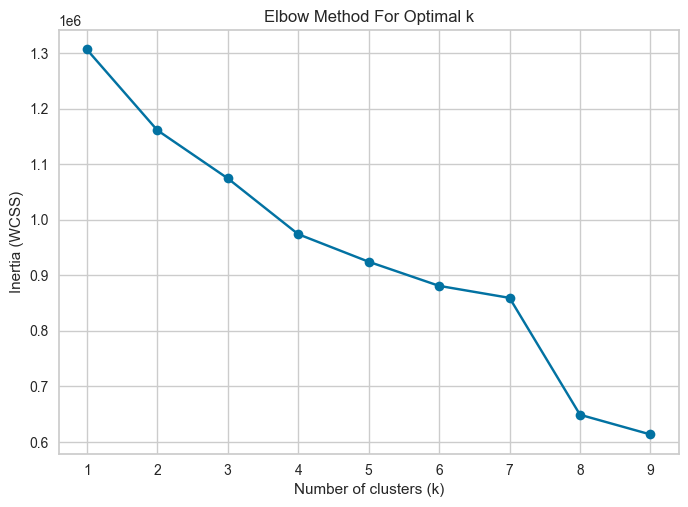

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use the elbow method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


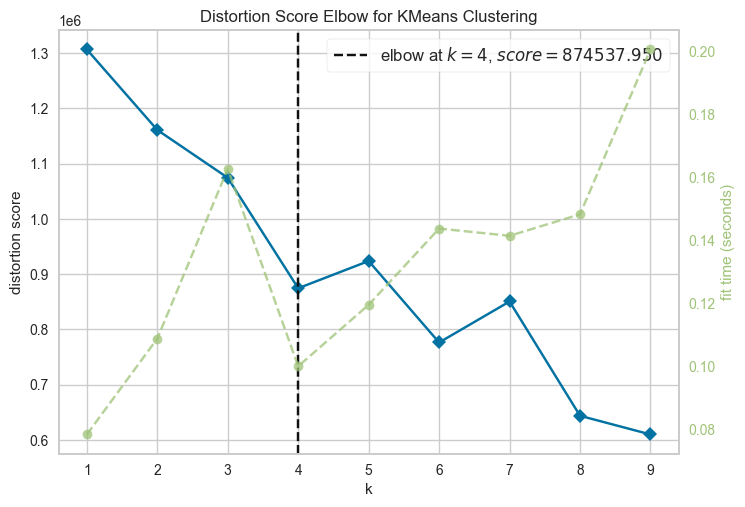

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

#Plotting Elbow Curve
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_train)
visualizer.poof()

In [24]:
X_train

array([[ 1.19603824,  0.51327648, -1.3561027 , ..., -0.01545612,
         1.04264482, -0.41016361],
       [ 1.16539222, -0.46712542,  1.30726731, ..., -0.01545612,
        -0.95909938, -0.41016361],
       [ 0.29198062, -1.44752732, -1.64076264, ..., -0.01545612,
        -0.95909938, -0.41016361],
       ...,
       [ 0.1264921 ,  0.34987616,  0.49091496, ..., -0.01545612,
         1.04264482, -0.41016361],
       [-0.18456501,  1.00347743,  1.66063827, ..., -0.01545612,
         1.04264482, -0.41016361],
       [-1.66936474, -0.46712542,  1.28927157, ..., -0.01545612,
         1.04264482, -0.41016361]], shape=(100488, 13))

### --- Unsupervised Learning Section (No PCA) ---

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

# # --- KMeans Clustering ---
# k = [2, 3] # did not take 5 or 7 as results showed they are not valid plots
# for ks in k:
#     kmeans = KMeans(n_clusters=ks, random_state=42)
#     kmeans_labels = kmeans.fit_predict(X_train)
#     a = [0, 1, 2, 7]
#     b = [3, 5]
#     for aa in b:
#         for bb in a:
#             plt.figure(figsize=(6,4))
#             sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=kmeans_labels, palette="Set1")
#             plt.title("KMeans Clustering")
#             plt.xlabel("Fea " + str(aa))
#             plt.ylabel("Fea " + str(bb))
#             plt.show()
#
# # --- Hierarchical Clustering ---
#
# plt.figure(figsize=(8, 4))
# sns.heatmap(X_train, cmap='viridis', cbar=True)
# plt.title("Heatmap BEFORE Hierarchical Clustering")
# plt.xlabel("Features")
# plt.ylabel("Samples")
# plt.show()
#
# linked = linkage(X_train, method='ward')
# plt.figure(figsize=(10, 4))
# dendrogram(linked, truncate_mode='lastp', p=50)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample Index or (Cluster Size)')
# plt.ylabel('Distance')
# plt.show()
#
# order = leaves_list(linked)  # get the new order of rows
#
# X_reordered = X.iloc[order, :]
# X_reordered_numeric = X_reordered.select_dtypes(include=[np.number])
#
# plt.figure(figsize=(8, 4))
# sns.heatmap(X_reordered_numeric, cmap='viridis', cbar=True)
# plt.title("Heatmap AFTER Hierarchical Clustering")
# plt.xlabel("Features")
# plt.ylabel("Samples")
# plt.show()
#
# # --- Hierarchical Clustering ---(Agglomerative(setting clusters manually))
# sz_clus = [3] # did not take 2 or 4 or 5 for bad performances
# for sz in sz_clus:
#     agglo = AgglomerativeClustering(n_clusters=sz)
#     agglo_labels = agglo.fit_predict(X_train)
#
#     a = [0, 1, 2, 7]
#     b = [3, 5]
#     for aa in b:
#         for bb in a:
#             plt.figure(figsize=(6,4))
#             sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=agglo_labels, palette="Set2")
#             plt.title("Agglomerative Clustering" + str(sz))
#             plt.xlabel("Fea " + str(aa))
#             plt.ylabel("Fea " + str(bb))
#             plt.show()

# --- DBSCAN ---
sz_dis = [2.5] # not using 1 or 4 due to unreasonable no. of clusters
sz_m_sample = [4, 5] # not using 1 or 10 due to unreasonable no. of clusters

for d_dis in sz_dis:
    for d_m_sample in sz_m_sample:
        dbscan = DBSCAN(eps=d_dis, min_samples=d_m_sample)
        dbscan_labels = dbscan.fit_predict(X_train)
        a = [0, 1, 2, 7]
        b = [3, 5]
        for aa in b:
            for bb in a:
                plt.figure(figsize=(6,4))
                sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=dbscan_labels, palette="tab10")
                plt.title("DBSCAN Clustering " + str(d_dis) + " " + str(d_m_sample))
                plt.xlabel("Fea " + str(aa))
                plt.ylabel("Fea " + str(bb))
                plt.show()


### --- Unsupervised Learning Section (PCA) ---

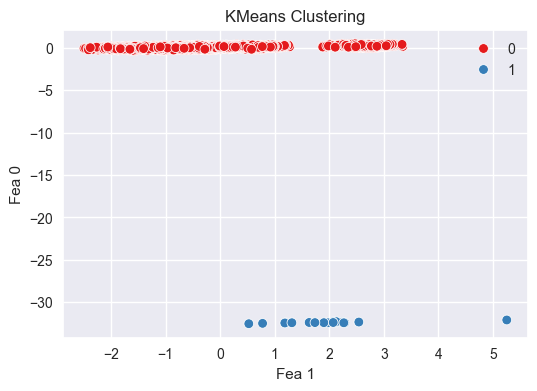

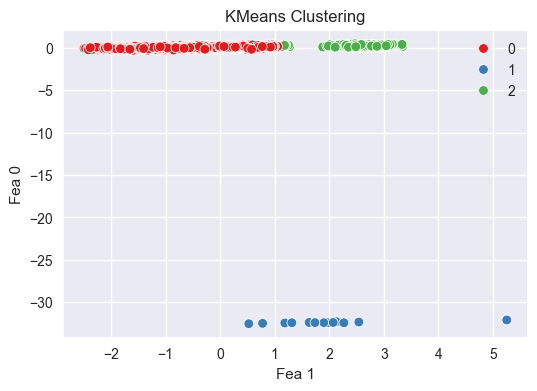

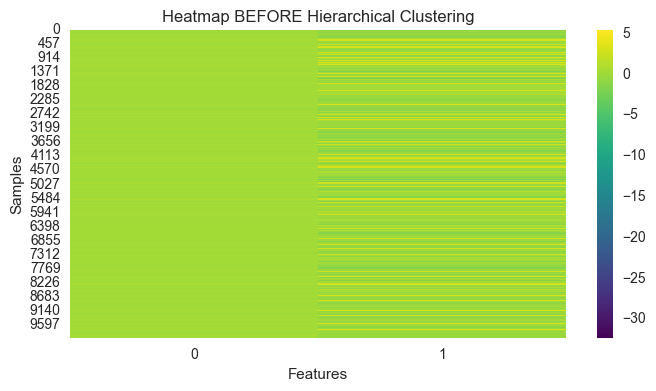

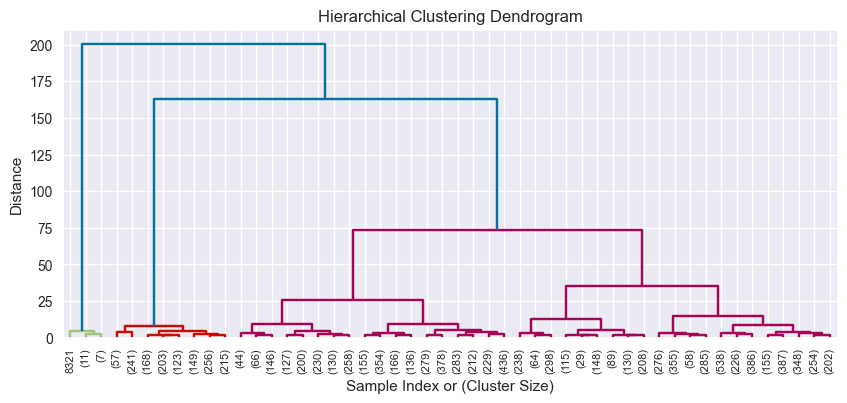

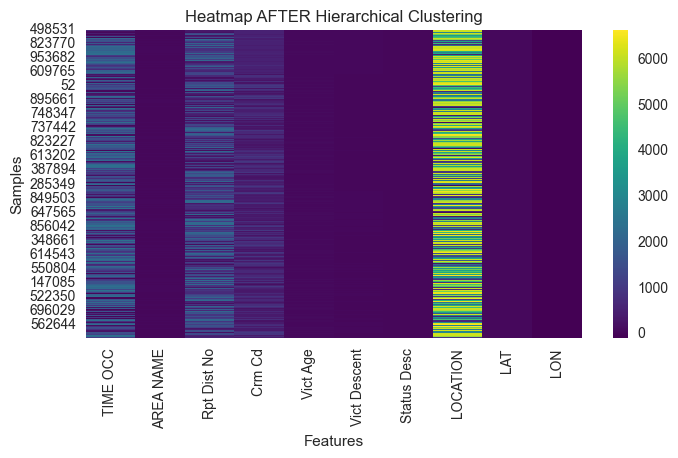

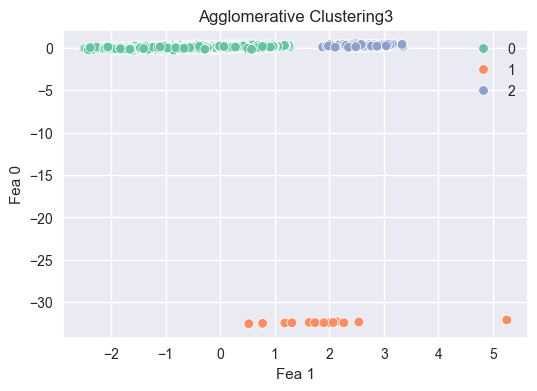

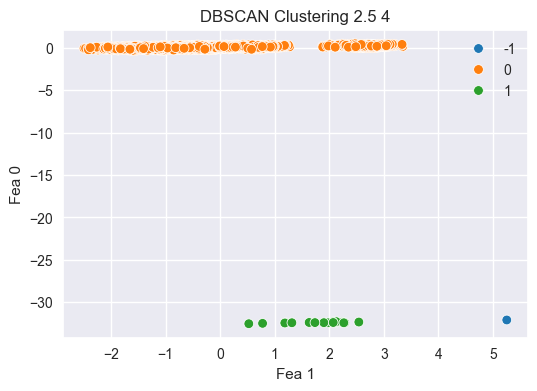

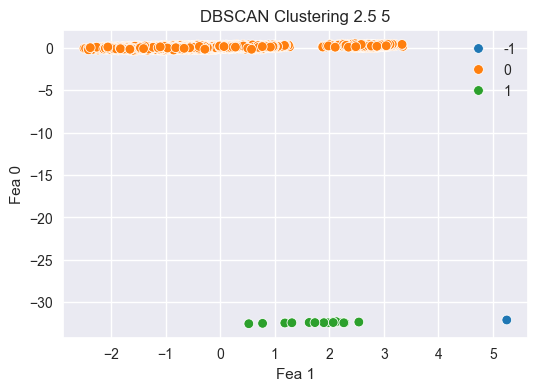

In [179]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.decomposition import PCA

# PCA for visualization (2D)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)

# --- KMeans Clustering ---
k = [2, 3] # did not take 5 or 7 as results showed they are not valid plots
for ks in k:
    kmeans = KMeans(n_clusters=ks, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_train)
    a = [0]
    b = [1]
    for aa in b:
        for bb in a:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=kmeans_labels, palette="Set1")
            plt.title("KMeans Clustering")
            plt.xlabel("Fea " + str(aa))
            plt.ylabel("Fea " + str(bb))
            plt.show()

# --- Hierarchical Clustering ---

plt.figure(figsize=(8, 4))
sns.heatmap(X_train, cmap='viridis', cbar=True)
plt.title("Heatmap BEFORE Hierarchical Clustering")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

linked = linkage(X_train, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(linked, truncate_mode='lastp', p=50)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

order = leaves_list(linked)  # get the new order of rows

X_reordered = X.iloc[order, :]
X_reordered_numeric = X_reordered.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 4))
sns.heatmap(X_reordered_numeric, cmap='viridis', cbar=True)
plt.title("Heatmap AFTER Hierarchical Clustering")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

# --- Hierarchical Clustering ---(Agglomerative(setting clusters manually))
sz_clus = [3] # did not take 2 or 4 or 5 for bad performances
for sz in sz_clus:
    agglo = AgglomerativeClustering(n_clusters=sz)
    agglo_labels = agglo.fit_predict(X_train)

    a = [0]
    b = [1]
    for aa in b:
        for bb in a:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=agglo_labels, palette="Set2")
            plt.title("Agglomerative Clustering" + str(sz))
            plt.xlabel("Fea " + str(aa))
            plt.ylabel("Fea " + str(bb))
            plt.show()

# --- DBSCAN ---
sz_dis = [2.5] # not using 1 or 4 due to unreasonable no. of clusters
sz_m_sample = [4, 5] # not using 1 or 10 due to unreasonable no. of clusters

for d_dis in sz_dis:
    for d_m_sample in sz_m_sample:
        dbscan = DBSCAN(eps=d_dis, min_samples=d_m_sample)
        dbscan_labels = dbscan.fit_predict(X_train)
        a = [0]
        b = [1]
        for aa in b:
            for bb in a:
                plt.figure(figsize=(6,4))
                sns.scatterplot(x=X_train[:,aa], y=X_train[:,bb], hue=dbscan_labels, palette="tab10")
                plt.title("DBSCAN Clustering " + str(d_dis) + " " + str(d_m_sample))
                plt.xlabel("Fea " + str(aa))
                plt.ylabel("Fea " + str(bb))
                plt.show()
